# Dirichlet Distribution

In this section, we will be showcasing the Dirichlet Distribution and using D3.js {cite:p}`bostock2011d3` to provide illustrations for concepts. 

In [1]:
from IPython.display import  HTML

def load_d3_in_cell_output():
  display(HTML("<script src='https://d3js.org/d3.v6.min.js'></script>"))
get_ipython().events.register('pre_run_cell', load_d3_in_cell_output)

## The Chinese Restaurant Process

In the thought problem, we will be examing a situation where a hungry person (🤔) enters a restaurant and needs to choose a table (⚪).

This original was developed by {cite:p}`aldous1985exchangeability` and a great resource to consider is Pasupat's ({cite:p}`Pasupat_2021`).

Here are the ground rules for this thought problem.
  

## Rules for Our Thought Problem

### 1. An Infinite Amount of Tables (⚪)

We are depicting five tables (⚪⚪⚪⚪⚪), but we need to consider a situation where the number of tables is infinite. 

* ⚪ = ∞

### 2. A Hungry Person (🤔) Only Two Options

When a hungry person (🤔) walks into the restaurant they have two options: 
    
* Either they sit a table (⚪) with someone else (😃) 
* or pick a new table  (⚪) 

To simplify this, here a decision chart. 

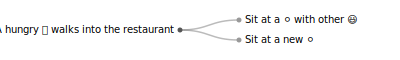

In [2]:
from IPython.display import SVG, display
display(SVG(url='https://raw.githubusercontent.com/dudaspm/LDA_Bias_Data/main/images/startCondition.svg'))

And to further reduce this down, we will be using this:

### 3. Many ⚪ & 😃, Only One Empty ⚪

This goes with #2, but in our scenario, there is the number of tables (⚪) with people (😃), but when considering an empty table (⚪). We will only consider *one* of the infinite number of tables (⚪) open. Another way to consider this is either a hungry person (🤔):
* sits at the *one of possible many* tables (⚪) with someone else (😃) 
* *OR* they sit at the *one* new table  (⚪)

### All Tables (⚪) are Equal
Notice that all the tables are equal distance away. So, there is no weighting based on the distance, and each table is equally likely to be picked.     

In [3]:
%%html
<input type="button" onclick="runWeight()" value="Run Animation">
<div id="runWeight"></div>

<script type="text/javascript">   
    function runWeight() {
        var width = 600
        var height = 270
        var margin = 35
        var radius = 200
        
        d3.select("div#runWeight").select("svg").remove()
        var svg1 = d3.select("div#runWeight").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg1.selectAll("line")
            .data(d3.range(5))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg1.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", "white")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        svg1.append("text")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
    }
    runWeight()
</script>

### Key for Thought Problem

> 🤔 - hungry person
* The person who needs to find a seat at a table

> 😃 - person eating
* A person already at a table

> ⚪ - a possible table
* A potential seat for the hungry person to sit at

> ⚫ - a not possible table 
* Not a potential seat for the hungry person to sit at (see Rule #3).

## All Solutions 💥TO THE EXTREME💥

Now that we have our ground rules let's approach this problem from, what I am calling, the extreme positions. We have not mentioned a single bit of math up to this point, but this section will contain conversations around probabilities. Here are three scenarios for our extreme positions. 

1. The Social Butterfly
2. The Gambler
3. The Long Day

### 1. The Social Butterfly

The social butterfly assumes every person that enters the restaurants wants to sit at the table with the most people. 

In [4]:
%%html
<input type="button" onclick="social1()" value="Run Animation">
<div id="social1"></div>

<script type="text/javascript">   
    function social1() {
        var width = 600
        var height = 270
        var margin = 35
        var radius = 200
        
        d3.select("div#social1").select("svg").remove()
        var svg2 = d3.select("div#social1").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg2.selectAll("line")
            .data(d3.range(1))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg2.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=0)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["1","0","0","0","0"]
        svg2.selectAll("text")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg2.append("text")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
    }
    social1()
</script>

The following person (🤔) walks in and sits at the most popular table. 

In [5]:
%%html
<input type="button" onclick="social2()" value="Run Animation">
<div id="social2"></div>

<script type="text/javascript">   
    function social2() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#social2").select("svg").remove()
        var svg3 = d3.select("div#social2").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg3.selectAll("line")
            .data(d3.range(2))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg3.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=1)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["1/1","0","0","0","0"]
        svg3.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg3.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed")
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed")
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,1,svg3)
    }
    social2()
</script>

and repeat this process for the next three customers (🤔).

In [6]:
%%html
<input type="button" onclick="social5()" value="Run Animation">
<div id="social5"></div>

<script type="text/javascript">   
    function social5() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#social5").select("svg").remove()
        var svg6 = d3.select("div#social5").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg6.selectAll("line")
            .data(d3.range(2))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg6.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=1)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["4/4","0","0","0","0"]
        svg6.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg6.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed")
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed")
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,4,svg6)
    }
    social5()
</script>

### 2. The Gambler

The Gambler is the person who only cares about the probabilities. Meaning, if there are two tables (⚪), then they have a 50/50 choice, and they do not care at all about the people sitting there or not. 

In [7]:
%%html
<input type="button" onclick="gambler1()" value="Run Animation">
<div id="gambler1"></div>

<script type="text/javascript">   
    function gambler1() {
        var width = 600
        var height = 270
        var margin = 35
        var radius = 200
        
        d3.select("div#gambler1").select("svg").remove()
        var svg7 = d3.select("div#gambler1").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg7.selectAll("line")
            .data(d3.range(1))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg7.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=0)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["1/1","0","0","0","0"]
        svg7.selectAll("text")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg7.append("text")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
    }
    gambler1()
</script>

Where the probability is now $p = \frac{1}{2}$

In [8]:
%%html
<input type="button" onclick="gambler2()" value="Run Animation">
<div id="gambler2"></div>

<script type="text/javascript">   
    function gambler2() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#gambler2").select("svg").remove()
        var svg8 = d3.select("div#gambler2").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg8.selectAll("line")
            .data(d3.range(2))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg8.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=1)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["1/2","1/2","0","0","0"]
        svg8.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg8.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed")
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed")
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,1,svg8)
    }
    gambler2()
</script>

Now $p = \frac{1}{3}$

In [9]:
%%html
<input type="button" onclick="gambler3()" value="Run Animation">
<div id="gambler3"></div>

<script type="text/javascript">   
    function gambler3() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#gambler3").select("svg").remove()
        var svg9 = d3.select("div#gambler3").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])
        fractions = ["1/3","1/3","1/3","0","0"]
        svg9.selectAll("line")
            .data(d3.range(3))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg9.selectAll("circle")
            // Collect
            .data(fractions)
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (+d!=0)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        
        svg9.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg9.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s,c) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed_"+c)
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed_"+c)
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,1,svg9,0)
        var cx = ((radius) * Math.cos(x(1))) + (width/2)
        var cy = ((radius) * Math.sin(x(1))) + (height-margin)
        addPeople(cx,cy,1,svg9,1)
    }
    gambler3()
</script>

Then probability is now $p = \frac{1}{4}$

In [10]:
%%html
<input type="button" onclick="gambler4()" value="Run Animation">
<div id="gambler4"></div>

<script type="text/javascript">   
    function gambler4() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#gambler4").select("svg").remove()
        var svg10 = d3.select("div#gambler4").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])
        fractions = ["1/4","1/4","1/4","1/4","0"]
        svg10.selectAll("line")
            .data(d3.range(4))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg10.selectAll("circle")
            // Collect
            .data(fractions)
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (+d!=0)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        
        svg10.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg10.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s,c) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed_"+c)
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed_"+c)
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,1,svg10,0)
        var cx = ((radius) * Math.cos(x(1))) + (width/2)
        var cy = ((radius) * Math.sin(x(1))) + (height-margin)
        addPeople(cx,cy,1,svg10,1)
        var cx = ((radius) * Math.cos(x(2))) + (width/2)
        var cy = ((radius) * Math.sin(x(2))) + (height-margin)
        addPeople(cx,cy,1,svg10,2)
    }
    gambler4()
</script>

Finally, all tables (⚪) are probability $p = \frac{1}{5}$

In [11]:
%%html
<input type="button" onclick="gambler5()" value="Run Animation">
<div id="gambler5"></div>

<script type="text/javascript">   
    function gambler5() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#gambler5").select("svg").remove()
        var svg11 = d3.select("div#gambler5").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])
        fractions = ["1/5","1/5","1/5","1/5","1/5"]
        svg11.selectAll("line")
            .data(d3.range(5))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg11.selectAll("circle")
            // Collect
            .data(fractions)
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (+d!=0)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        
        svg11.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg11.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s,c) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed_"+c)
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed_"+c)
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,1,svg11,0)
        var cx = ((radius) * Math.cos(x(1))) + (width/2)
        var cy = ((radius) * Math.sin(x(1))) + (height-margin)
        addPeople(cx,cy,1,svg11,1)
        var cx = ((radius) * Math.cos(x(2))) + (width/2)
        var cy = ((radius) * Math.sin(x(2))) + (height-margin)
        addPeople(cx,cy,1,svg11,2)
        var cx = ((radius) * Math.cos(x(3))) + (width/2)
        var cy = ((radius) * Math.sin(x(3))) + (height-margin)
        addPeople(cx,cy,1,svg11,3)
    }
    gambler5()
</script>

### 3. The Long Day

The Long Day scenario describes a situation where customers (🤔) coming into the restaurant had a reeeeeeeeeeeeeeeally long day. All they want is a table (⚪) to themselves to eat their food, pay, and go home. This scenario is the opposite of the Social Butterfly, where people are at a table (😃 & ⚪). They will find an empty table (⚪).


In [12]:
%%html
<input type="button" onclick="long1()" value="Run Animation">
<div id="long1"></div>

<script type="text/javascript">   
    function long1() {
        var width = 500
        var height = 270
        var margin = 35
        var radius = 200
        
        d3.select("div#long1").select("svg").remove()
        var svg12 = d3.select("div#long1").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg12.selectAll("line")
            .data(d3.range(1))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg12.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=0)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["1/1","0","0","0","0"]
        svg12.selectAll("text")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg12.append("text")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
    }
    long1()
</script>

With this selection, the customer (🤔) will always pick the new table. 

In [13]:
%%html
<input type="button" onclick="long2()" value="Run Animation">
<div id="long2"></div>

<script type="text/javascript">   
    function long2() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#long2").select("svg").remove()
        var svg13 = d3.select("div#long2").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg13.selectAll("line")
            .data(d3.range(2))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg13.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=1)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["0","1/1","0","0","0"]
        svg13.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg13.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s,c) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed_"+c)
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed_"+c)
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,1,svg13,0)

    }
    long2()
</script>

Repeat for all customers (🤔).

In [14]:
%%html
<input type="button" onclick="long5()" value="Run Animation">
<div id="long5"></div>

<script type="text/javascript">   
    function long5() {
        var width = 600
        var height = 300
        var margin = 55
        var radius = 200
        
        d3.select("div#long5").select("svg").remove()
        var svg16 = d3.select("div#long5").append("svg")
            .attr("width", width)
            .attr("height", height)

        var x = d3.scaleLinear().domain([0,d3.range(5).length-1]).range([Math.PI, 2*Math.PI])

        svg16.selectAll("line")
            .data(d3.range(5))
            .join("line")
            .attr("x1", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y1", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("x2", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin)) 
            .style("stroke","darkgrey")
            .style("stroke-width", "10px")
            .style("stroke-linecap","round")
            .transition("line")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x2", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y2", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))    

        svg16.selectAll("circle")
            // Collect
            .data(d3.range(5))
            // Update
            .join("circle")
            .attr("cx", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .attr("r", (d,i)=> 30)
            .style("fill", (d,i)=> (i<=4)?"white":"black")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            .transition("circle")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("cx", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("cy", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))

        fractions = ["0","0","0","0","1"]
        svg16.selectAll("text.perc")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc")
            .attr("x", (d,i)=> ((0) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((0) * Math.sin(x(i))) + (height-margin))  
            .style("font-size","30px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
            .transition("text")
            .duration(1000)
            .delay((d,i)=> i * 100)
            .attr("x", (d,i)=> ((radius) * Math.cos(x(i))) + (width/2))
            .attr("y", (d,i)=> ((radius) * Math.sin(x(i))) + (height-margin))
        
        
        
        svg16.append("text")
            .attr("class","hungry")
            .attr("x", width/2)
            .attr("y", (height-margin))
            .style("font-size","50px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("🤔")
        
        function addPeople(cx,cy,e,s,c) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed_"+c)
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed_"+c)
                .attr("x", cx)
                .attr("y", cy)  
                .style("font-size","30px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> i * 100)
                .attr("x", (d,i)=> ((40) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((40) * Math.sin(xc(i))) + cy)
        
            
        }
        var cx = ((radius) * Math.cos(x(0))) + (width/2)
        var cy = ((radius) * Math.sin(x(0))) + (height-margin)
        addPeople(cx,cy,1,svg16,0)
        var cx = ((radius) * Math.cos(x(1))) + (width/2)
        var cy = ((radius) * Math.sin(x(1))) + (height-margin)
        addPeople(cx,cy,1,svg16,1)
        var cx = ((radius) * Math.cos(x(2))) + (width/2)
        var cy = ((radius) * Math.sin(x(2))) + (height-margin)
        addPeople(cx,cy,1,svg16,2)
        var cx = ((radius) * Math.cos(x(3))) + (width/2)
        var cy = ((radius) * Math.sin(x(3))) + (height-margin)
        addPeople(cx,cy,1,svg16,3)

    }
    long5()
</script>

## The Conclusions

### ✨1st Conclusion✨

So, let's take a look at all three of these scenario results.

In [15]:
%%html
<input type="button" value="✨1st Conclusion✨" style="font-size:20px" onclick="conclusion1()">
<div id="conc"></div>

<script type="text/javascript">   
    var svg17, x, firsty
    function conclusion1() {
        var equation = ["+","+","+","+","= 1"]
        d3.range(3).forEach((d,row)=>{
            svg17.selectAll("text.equ_"+row)
                // Collect
                .data(equation)
                // Update
                .join("text")
                .attr("class","equ_"+row)
                .attr("x", 0)
                .attr("y", firsty(row))  
                .style("font-size","20px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>d) 
                .transition("text2")
                .duration(1000)
                .delay((d,i)=> (5-i) * 100)
                .attr("x", (d,i)=> (i==4) ? (x(i+1)) : (x(i)+x(i+1))/2)
            
        })


    }
    function conc() {
        var width = 600
        var height = 400
        var margin = 65
        var radius = 200
        
        d3.select("div#conc").select("svg").remove()
        svg17 = d3.select("div#conc").append("svg")
            .attr("width", width)
            .attr("height", height)

        x = d3.scaleLinear().range([margin,width-margin]).domain([0,6])
        firsty = d3.scaleLinear().range([margin,height-margin]).domain([0,2])
        
        fractions = ["1","0","0","0","0"]
        svg17.selectAll("circle.row1")
            .data(fractions)
            .join("circle")
            .attr("class","row1")
            .attr("cx", (d,i)=> x(i))
            .attr("cy", firsty(0))  
            .attr("r", 20)
            .style("fill", "white")
            .style("stroke", "black")
            .style("stroke-width", "1px")
            
        svg17.selectAll("text.perc1")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc1")
            .attr("x", (d,i)=> x(i))
            .attr("y", firsty(0))  
            .style("font-size","20px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)

        
        fractions = ["1/5","1/5","1/5","1/5","1/5"]
        svg17.selectAll("circle.row2")
            .data(fractions)
            .join("circle")
            .attr("class","row2")
            .attr("cx", (d,i)=> x(i))
            .attr("cy", firsty(1))  
            .attr("r", 20)
            .style("fill", "white")
            .style("stroke", "black")
            .style("stroke-width", "1px")

        svg17.selectAll("text.perc2")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc2")
            .attr("x", (d,i)=> x(i))
            .attr("y", firsty(1))  
            .style("font-size","20px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)

        
        fractions = ["0","0","0","0","1"]
        svg17.selectAll("circle.row3")
            .data(fractions)
            .join("circle")
            .attr("class","row3")
            .attr("cx", (d,i)=> x(i))
            .attr("cy", firsty(2))  
            .attr("r", 20)
            .style("fill", "white")
            .style("stroke", "black")
            .style("stroke-width", "1px")

        svg17.selectAll("text.perc3")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("class","perc3")
            .attr("x", (d,i)=> x(i))
            .attr("y", firsty(2))  
            .style("font-size","20px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)

        
        svg17.append("text")
            .attr("class","title1")
            .attr("x", 20)
            .attr("y", firsty(0)-45)  
            .style("font-size","20px")
            .style("alignment-baseline","middle")
            .text("The Social Butterfly")     
        
        svg17.append("text")
            .attr("class","title1")
            .attr("x", 20)
            .attr("y", firsty(1)-45)  
            .style("font-size","20px")
            .style("alignment-baseline","middle")
            .text("The Gambler") 

        svg17.append("text")
            .attr("class","title1")
            .attr("x", 20)
            .attr("y", firsty(2)-45)  
            .style("font-size","20px")
            .style("alignment-baseline","middle")
            .text("The Long Day") 
        
        function addPeople(cx,cy,e,s,c) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed_"+c)
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed_"+c)
                .attr("x", (d,i)=> ((20) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((20) * Math.sin(xc(i))) + cy)
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>"😃")

        
            
        }
        var cx = x(0)
        var cy = firsty(0)
        addPeople(cx,cy,4,svg17,0)
        
        d3.range(4).forEach((d,i) => {
            var cx = x(i)
            var cy = firsty(1)
            addPeople(cx,cy,1,svg17,i+1)
            
        })

        d3.range(4).forEach((d,i) => {
            var cx = x(i)
            var cy = firsty(2)
            addPeople(cx,cy,1,svg17,i+6)
            
        })

    }
    conc()
</script>

Our ✨1st Conclusion✨ is that for each scenario, the total probabilities (when added together) equal 1. This conclusion is our first connection to the *Dirichlet Distribution*. 

```{admonition} Dirichlet Distribution Always Sum to 1
:class: tip
Regardless of the number of tables (⚪), the number of people at the tables (😃), or a hungry persons' (🤔) strategy. The total probability will be 1. This concept is also considered to be a *probability mass function* or PMF property. 
```

### ✨2nd Conclusion✨

This easiest to see with our "The Gambler" scenerio. 

In [16]:
%%html
<input type="button" value="✨2nd Conclusion✨" style="font-size:20px" onclick="conclusion2()">
<div id="conc2"></div>

<script type="text/javascript">   
    var svg18, secx, secy
    var width = 600
    var height = 300
    var margin = 65
    var radius = 200
    function conclusion2() {
        conc2()
        svg18.selectAll("circle#face_4")
            .transition("move1")
            .duration(1000)
            .attr("cx", (d,i)=> secx(5))
        
        svg18.selectAll("text#face_4")
            .transition("move2")
            .duration(1000)
            .attr("x", (d,i)=> secx(5))
        
        svg18.selectAll("text#feed_5")
            .transition("move2b")
            .duration(1000)
            .attr("x", (d,i)=> secx(5)-20)
        
        svg18.append("line")
            .attr("id","join")
            .attr("x1", (x(3) + secx(0))/2)
            .attr("y1", (secy(1)+secy(0))/2)
            .attr("x2", (x(3) + secx(0))/2)
            .attr("y2", (secy(1)+secy(0))/2)
            .style("stroke", "purple")
            .style("stroke-width", "3px")
            .transition("move3")
            .duration(1000)
            .attr("x1", secx(0) - 10)
            .attr("x2", secx(3) + 10)
        
        svg18.append("line")
            .attr("id","join")
            .attr("x1", (secx(6) + secx(4))/2)
            .attr("y1", (secy(1)+secy(0))/2)
            .attr("x2", (secx(6) + secx(4))/2)
            .attr("y2", (secy(1)+secy(0))/2)
            .style("stroke", "steelblue")
            .style("stroke-width", "3px")
            .transition("move4")
            .duration(1000)
            .attr("x1", secx(4) - 10)
            .attr("x2", secx(6) + 10)
        
        svg18.append("text")
            .attr("id","join")
            .attr("x", (d,i)=> - 10)
            .attr("y", secy(1))  
            .style("font-size","20px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("To Join")
            .transition("move5")
            .duration(1000)
            .attr("x", (secx(3) + secx(0))/2) 
        
        svg18.append("text")
            .attr("id","join")
            .attr("x", (d,i)=> width + 10)
            .attr("y", secy(1))  
            .style("font-size","20px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("Or Not To Join")
            .transition("move6")
            .duration(1000)
            .attr("x", (secx(6) + secx(4))/2) 
        
        svg18.append("text")
            .attr("id","join")
            .attr("x", (d,i)=> ((secx(4) - 10)+(secx(3) + 10))/2)
            .attr("y", -10)  
            .style("font-size","20px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("+")
            .transition("move6")
            .duration(1000)
            .attr("y", (secy(1)+secy(0))/2)
        
        
        function createEquation1(cx,cy,top) {
            svg18.append("text")
                .attr("x", cx)
                .attr("y", height+10)  
                .style("font-size","20px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(top)
                .transition("move6")
                .duration(1000)
                .attr("y", secy(2)-15)
            
            svg18.append("line")
                .attr("x1", cx)
                .attr("y1", 0)  
                .attr("x2", cx)
                .attr("y2", 0)
                .style("stroke", (top == "🤔") ? "steelblue" : "purple")
                .style("stroke-width", "3px")
                .transition("move7")
                .duration(1000)
                .attr("y1", cy)
                .attr("y2", cy)
                .transition("move8")
                .duration(1000)
                .attr("x1", cx-20)
                .attr("x2", cx+20)
            
            svg18.append("text")
                .attr("x", cx)
                .attr("y", height+10)  
                .style("font-size","10px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text("😃😃😃😃🤔")
                .transition("move8")
                .duration(1000)
                .attr("y", secy(2)+15)
            
        }
        function createEquation2(cx,top) {
            svg18.append("text")
                .attr("x", cx)
                .attr("y", height+10)  
                .style("font-size",(top=="= 1") ? "30px" : "20px")
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(top)
                .transition("move6")
                .duration(1000)
                .attr("y", secy(2))

        }
        createEquation1(secx(0),secy(2),"😃")
        createEquation2((secx(0)+secx(1))/2,"+")
        
        createEquation1(secx(1),secy(2),"😃")
        createEquation2((secx(1)+secx(2))/2,"+")        
        
        createEquation1(secx(2),secy(2),"😃")
        createEquation2((secx(2)+secx(3))/2,"+")
        
        createEquation1(secx(3),secy(2),"😃")
        createEquation2((secx(3)+secx(4))/2,"+")
        
        createEquation1(secx(5),secy(2),"🤔")
        createEquation2((secx(6)),"= 1")
    }
    function conc2() {
        
        d3.select("div#conc2").select("svg").remove()
        svg18 = d3.select("div#conc2").append("svg")
            .attr("width", width)
            .attr("height", height)

        secx = d3.scaleLinear().range([margin,width-margin]).domain([0,6])
        secy = d3.scaleLinear().range([margin,height-margin]).domain([0,2])
        

        
        fractions = ["1/5","1/5","1/5","1/5","1/5"]
        svg18.selectAll("circle.row2")
            .data(fractions)
            .join("circle")
            .attr("id",(d,i)=> "face_"+i)
            .attr("class","row2")
            .attr("cx", (d,i)=> secx(i))
            .attr("cy", secy(0))  
            .attr("r", 20)
            .style("fill", "white")
            .style("stroke", "black")
            .style("stroke-width", "1px")

        svg18.selectAll("text.perc2")
            // Collect
            .data(fractions)
            // Update
            .join("text")
            .attr("id",(d,i)=> "face_"+i)
            .attr("class","perc2")
            .attr("x", (d,i)=> secx(i))
            .attr("y", secy(0))  
            .style("font-size","20px")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text(d=>d)
        

        



        
        function addPeople(cx,cy,e,s,c) {
            var xc = d3.scaleLinear().domain([0,d3.range(e).length]).range([Math.PI, 3*Math.PI])
            s.selectAll("text.feed_"+c)
                // Collect
                .data(d3.range(e))
                // Update
                .join("text")
                .attr("class","feed_"+c)
                .attr("id","feed_"+c)
                .attr("x", (d,i)=> ((20) * Math.cos(xc(i))) + cx)
                .attr("y", (d,i)=> ((20) * Math.sin(xc(i))) + cy)
                .style("text-anchor", "middle")
                .style("alignment-baseline","middle")
                .text(d=>(c==5)?"🤔":"😃")

        
            
        }

        
        d3.range(5).forEach((d,i) => {
            var cx = secx(i)
            var cy = secy(0)
            addPeople(cx,cy,1,svg18,i+1)
            
        })



    }
    conc2()
</script>

```{admonition} When All Possibility Are Equally Likely
:class: tip
In situations where are all possibilities are equally likely (equally likely to sit at a table with someone else (⚪&😃) or sit at a new table (⚪)), we can abbreviate this to a simple probablity:

$\frac{😃}{😃😃😃😃🤔}$ 
$ = $
$\frac{\text{Number of people sitting at table (⚪&😃)}}{\text{All people (😃😃😃😃🤔)}}$ 
$ = $
$\frac{N_j}{N}$

AND 

$\frac{🤔}{😃😃😃😃🤔}$ 
$ = $
$\frac{\text{Number of people who can sit at a new table (⚪)}}{\text{All people (😃😃😃😃🤔)}}$ 
$ = $
$\frac{1}{N}$
```

```{admonition} To Join Or Not To Join
:class: tip
As shown in the animation, there are two conditions: to join *or* not to join. Both of these take advantage of the $\frac{N_j}{N}$ relationship, but it can be seen that as tables are filled, the more likely this could occur. Meaning... 

*To join*

$\frac{😃}{😃😃😃😃🤔}$ 
$ + $
$\frac{😃}{😃😃😃😃🤔}$ 
$ + $
$\frac{😃}{😃😃😃😃🤔}$ 
$ + $
$\frac{😃}{😃😃😃😃🤔}$ 
$ + $
$ = $
$\frac{N-1}{N}$     

*Or Not To Join*

$\frac{🤔}{😃😃😃😃🤔}$ 
$ = $
$\frac{1}{N}$  
```

To expand on this idea, we need to look at more of a real situation. Where someone entering the restaurant is making a decision and not the extremes. In the visualization below, click on the tables to add people to that table. We are introducing a new concept as well. That being a probability (p). The first table, before anyone is seated, will be  $\frac{p}{p} = 1 $. Meaning, if we change this probability to any number, the math will always work out. Then as we add people to tables, we will keep expanding on this introduction of the probability. 

Remember, for each table, we are saying $\frac{N_j}{N}$, where $N_j = \text{Number of people sitting at table j (}⚪_j\text{&😃)}$ and $N = \text{All people (😃😃😃😃🤔)}$ = $\frac{\text{Number of people sitting at table (⚪&😃)}}{\text{All people (😃😃😃😃🤔)}}$ 

Also, $\frac{\text{Number of people who can sit at a new table (⚪)}}{\text{All people (😃😃😃😃🤔)}}$  $ = \frac{1}{N}$

or simply
$\frac{N_j}{N} + \frac{1}{N} = 1$


```{note} 
In the next animation, click on the circles to add new people. 
```

In [17]:
%%html
<div id="conc3"></div>

<script type="text/javascript">   
    var svg19, x3, y3
    
    function conc3() {
        var width = 600
        var height = 260
        var margin = 60
        var radius = 200

        d3.select("div#conc3").select("svg").remove()
        svg19 = d3.select("div#conc3").append("svg")
        .attr("width", width)
        .attr("height", height)

        x3 = d3.scaleLinear().range([margin,width-margin]).domain([0,9])
        y = d3.scaleLinear().range([margin,height-margin]).domain([0,2])

        data = d3.range(10).map(d=>0)
        counter = 0
        svg19.selectAll("text.numerator")
            .data(data)
            .join("text")
            .attr("id", (d,i)=>"row_"+i)
            .attr("class","numerator")
            .attr("x", (d,i)=> (i!=0) ? width+20 : x3(i))
            .attr("y", y(0)-10)  
            .attr("r", 30)
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("p")
        
        svg19.selectAll("line.vinculum")
            .data(data)
            .join("line")
            .attr("id", (d,i)=>"row_"+i)
            .attr("class","vinculum")
            .attr("x1", (d,i)=> (i!=0) ? (width+20)-10 : x3(i)-10)
            .attr("y1", y(0))  
            .attr("x2", (d,i)=> (i!=0) ? (width+20)+10 : x3(i)+10)
            .attr("y2", y(0))  
            .style("stroke", "black")
            .style("stroke-width", "1px")     
        
        svg19.selectAll("text.denominator")
            .data(data)
            .join("text")
            .attr("id", (d,i)=>"row_"+i)
            .attr("class","denominator")
            .attr("x", (d,i)=> (i!=0) ? width+20 : x3(i))
            .attr("y", y(0)+10)  
            .attr("r", 30)
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("p")
        
        
        
        svg19.selectAll("text.nj_num")
            .data(data)
            .join("text")
            .attr("id", (d,i)=>"row_"+i)
            .attr("class","nj_num")
            .attr("x", width+30)
            .attr("y", y(2)-10)  
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
        
        svg19.selectAll("text.nj_num_sub")
            .data(data)
            .join("text")
            .attr("id", (d,i)=>"row_"+i)
            .attr("class","nj_num_sub")
            .attr("x", width+30)
            .attr("y", y(2)-6)  
            .style("font-size",".5rem")
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
        
        svg19.selectAll("line.nj_vin")
            .data(data)
            .join("line")
            .attr("id", (d,i)=>"row_"+i)
            .attr("class","nj_vin")
            .attr("x1", width+30)
            .attr("y1", y(2))  
            .attr("x2", width+30)
            .attr("y2", y(2))  
            .style("stroke", "black")
            .style("stroke-width", "1px")     
        
        svg19.selectAll("text.nj_den")
            .data(data)
            .join("text")
            .attr("id", (d,i)=>"row_"+i)
            .attr("class","nj_den")
            .attr("x", width+30)
            .attr("y", y(2)+10)  
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")

        svg19.selectAll("text_nj_plus")
            .data(data)
            .join("text")
            .attr("id", (d,i)=>"row_"+i)
            .attr("class","text_nj_plus")
            .attr("x", (d,i)=>x3(i)+((x3(1)-x3(0))/2))
            .attr("y", y(2))  
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text((d,i)=>(i==9)? "= 1":"+")
        
        svg19
            .append("line")
            .attr("class","tojoin")
            .attr("x1", x3(0))
            .attr("y1", y(.5))  
            .attr("x2", x3(0))
            .attr("y2", y(.5))  
            .style("stroke", "purple")
            .style("stroke-width", "3px")   

        svg19
            .append("text")
            .attr("class","tojoin")
            .attr("x", -30)
            .attr("y", y(.75))  
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("To Join")

        svg19
            .append("line")
            .attr("class","ornot")
            .attr("x1", x3(0)-20)
            .attr("y1", y(.5))  
            .attr("x2", x3(0)+20)
            .attr("y2", y(.5))  
            .style("stroke", "steelblue")
            .style("stroke-width", "3px") 
        
        svg19
            .append("text")
            .attr("class","ornot")
            .attr("x", width+30)
            .attr("y", y(.75))  
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("Not To Join")

        svg19.selectAll("circle")
            .data(data)
            .join("circle")
            .attr("id", (d,i)=>"row_"+i)
            .attr("cx", (d,i)=> (i!=0) ? width+20 : x3(i))
            .attr("cy", y(0))  
            .attr("r", 30)
            .style("fill", "white")
            .style("fill-opacity", 0)
            .style("stroke", (d,i)=>(i==9)?"darkgrey":"black")
            .style("stroke-width", "1px")
            .on("click", function(event, d) {   
                    const e = svg19.selectAll("circle").nodes();
                    const i = e.indexOf(this);
                if (i!=9) {
                    (data[i+1]==0) ? add(i) : update(i)

                }
            })
            .on("mouseover", function(event, d) {   
                    const e = svg19.selectAll("circle").nodes();
                    const i = e.indexOf(this);
                if (i!=9) {
                    d3.select(e[i]).style("stroke-width", "3px")
                }
            })
            .on("mouseout", function(event, d) { 
                svg19.selectAll("circle").style("stroke-width", "1px")
            })
        
        function add(i) {
            counter++
            if (data[i]=="p") data[i]=0
            data[i+1] = "p"
            data[i] = data[i] + 1
            
            svg19.select("line.tojoin")
                .transition()
                .attr("x1", x3(0)-20)
                .attr("x2", x3(i)+20)    
            
            svg19.select("text.tojoin")
                .transition()
                .attr("x", (x3(i)+x3(0))/2)
            
            svg19.select("line.ornot")
                .transition()
                .attr("x1", x3(i+1)-20)
                .attr("x2", x3(i+1)+20)
            
            svg19.select("text.ornot")
                .transition()
                .attr("x", x3(i+1))
            
            

 
            updateGraph()

        }    
        function update(i) {
            counter++
            if (data[i]=="p") data[i]=0
            data[i] = data[i] + 1
            
            updateGraph()
        }
        
        function updateGraph(){
            
            svg19.selectAll("circle").data(data)
                .transition()
                .attr("cx", (d,i)=> (d==0) ? width+20 : x3(i))

            svg19.selectAll("text.numerator").data(data)
                .transition()
                .attr("x", (d,i)=> (d==0) ? width+20 : x3(i))
                .text(d=>d)
            
            svg19.selectAll("line.vinculum")
                .data(data)  
                .transition()
                .attr("x1", (d,i)=> (d==0) ? (width+20)-10 : x3(i)-10)
                .attr("x2", (d,i)=> (d==0) ? (width+20)+10 : x3(i)+10)
            
            svg19.selectAll("text.denominator").data(data)
                .transition()
                .attr("x", (d,i)=> (d==0) ? width+20 : x3(i))
                .text(counter+"+p")
            
            
            svg19.selectAll("text.nj_num").data(data)
                .transition()
                .attr("x", (d,i)=> (d==0) ? width+20 : x3(i))
                .text((d,i)=>(d=="p") ? "p" : "N")
            
            svg19.selectAll("text.nj_num_sub").data(data)
                .transition()
                .attr("x", (d,i)=> (d==0) ? width+20 : x3(i)+8)
                .text((d,i)=>(d=="p") ? "" : i)
            
            svg19.selectAll("line.nj_vin")
                .data(data)  
                .transition()
                .attr("x1", (d,i)=> (d==0) ? (width+20)-10 : x3(i)-10)
                .attr("x2", (d,i)=> (d==0) ? (width+20)+10 : x3(i)+10)
            
            svg19.selectAll("text.nj_den").data(data)
                .transition()
                .attr("x", (d,i)=> (d==0) ? width+20 : x3(i))
                .text("N+p")
        }
        //update()


    }
    conc3()
</script>

This lines up perfectly with what we specified beforehand. 

$\frac{N_0}{N+p}+\frac{N_1}{N+p}+\frac{N_2}{N+p}+\frac{N_3}{N+p}+\frac{N_4}{N+p}+\frac{N_5}{N+p}+\frac{N_6}{N+p}+\frac{N_7}{N+p}+\frac{N_8}{N+p}+\frac{p}{N+p} = $

$\frac{N_0+N_1+N_2+N_3+N_4+N_5+N_6+N_7+N_8+p}{N+p} = $ where $N_0+N_1+N_2+N_3+N_4+N_5+N_6+N_7+N_8 = N$

$\frac{N+p}{N+p} = 1$

or, even better



```{admonition} The Predictive Probability
:class: tip
The Dirichlet has the predicitve probability of 

$\frac{N_j}{N+p} + \frac{p}{N+p} = 1$

Where, traditionally, you will see p written as alpha ($\alpha$).

So...
$\frac{N_j}{N+\alpha} + \frac{\alpha}{N+\alpha} = 1$

```

### 💰 The Rich Get Richer 💰

When dealing with the Dirichlet process, we are dealing with probabilities. As before, p or $\alpha$, represents a probability. In this case, the person entering will more than likely want to sit at a table and, more specifically, the table with the most people. This will rarely be as extreme as "The Social Butterfly," but instead be represented by the $\frac{N_j}{N+\alpha} + \frac{\alpha}{N+\alpha} = 1$ for each table. 

In this next animation, we will simulate the same experience as above but more realistic to the Dirichlet process. 

In [18]:
%%html
<table>
<tr>
<td style="text-align: left">
<h4> Changing Alpha Values </h4>

</td>
<td rowspan="2">
<input type="button" value="🍪Keep Clicking!🍪" style="font-size:20px" onclick="conclusion4()">
</td>
</tr>
<tr>
<td style="text-align: left">

<input type="radio" name="graph2" onclick="updatedProb(.2)"> .2
<input type="radio" name="graph2" onclick="updatedProb(1)" checked> 1
<input type="radio" name="graph2" onclick="updatedProb(5)"> 5
</td>
</tr>
</table>
<div id="conc4"></div>

<script type="text/javascript">   
    var svg20, x4, y4
    var dataProb = d3.range(10).map(d=>0)
    var counter = 0
    var bary
    function conc4() {
        var width = 600
        var height = 400
        var margin = 60
        var radius = 200

        d3.select("div#conc4").select("svg").remove()
        svg20 = d3.select("div#conc4").append("svg")
        .attr("width", width)
        .attr("height", height)

        x4 = d3.scaleLinear().range([margin,width-margin]).domain([0,9])
        y4 = d3.scaleLinear().range([margin,height-margin]).domain([0,2])

        svg20.selectAll("text.numerator")
            .data(dataProb)
            .join("text")
            .attr("id", (d,i)=>"row_"+i)
            .attr("class","numerator")
            .attr("x", (d,i)=> (i!=0) ? width+20 : x4(i))
            .attr("y", y4(0)-10)  
            .attr("r", 30)
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("1")
        
        svg20.selectAll("line.vinculum")
            .data(dataProb)
            .join("line")
            .attr("id", (d,i)=>"row_"+i)
            .attr("class","vinculum")
            .attr("x1", (d,i)=> (i!=0) ? (width+20)-10 : x4(i)-10)
            .attr("y1", y4(0))  
            .attr("x2", (d,i)=> (i!=0) ? (width+20)+10 : x4(i)+10)
            .attr("y2", y4(0))  
            .style("stroke", "black")
            .style("stroke-width", "1px")     
        
        svg20.selectAll("text.denominator")
            .data(dataProb)
            .join("text")
            .attr("id", (d,i)=>"row_"+i)
            .attr("class","denominator")
            .attr("x", (d,i)=> (i!=0) ? width+20 : x4(i))
            .attr("y", y4(0)+10)  
            .attr("r", 30)
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("1")

        svg20
            .append("line")
            .attr("class","tojoin")
            .attr("x1", x4(0))
            .attr("y1", y4(.5))  
            .attr("x2", x4(0))
            .attr("y2", y4(.5))  
            .style("stroke", "purple")
            .style("stroke-width", "3px")   

        svg20
            .append("text")
            .attr("class","tojoin")
            .attr("x", -30)
            .attr("y", y4(.75))  
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("To Join")

        svg20
            .append("line")
            .attr("class","ornot")
            .attr("x1", x4(0)-20)
            .attr("y1", y4(.5))  
            .attr("x2", x4(0)+20)
            .attr("y2", y4(.5))  
            .style("stroke", "steelblue")
            .style("stroke-width", "3px") 
        
        svg20
            .append("text")
            .attr("class","ornot")
            .attr("x", width+30)
            .attr("y", y4(.75))  
            .style("text-anchor", "middle")
            .style("alignment-baseline","middle")
            .text("Not To Join")

        svg20.selectAll("circle")
            .data(dataProb)
            .join("circle")
            .attr("id", (d,i)=>"row_"+i)
            .attr("cx", (d,i)=> (i!=0) ? width+20 : x4(i))
            .attr("cy", y4(0))  
            .attr("r", 30)
            .style("fill", "white")
            .style("fill-opacity", 0)
            .style("stroke", (d,i)=>(i==9)?"darkgrey":"black")
            .style("stroke-width", "1px")
        
        var barx = d3.scaleBand().range([margin , width - margin]).domain(d3.range(10).map(d=>barprobs[d].name)).padding(0)
        bary = d3.scaleLinear().range([y4(2) , y4(1)]).domain([0,1])

        var xAxis = d3.axisBottom().scale(barx)
        svg20.append("g")
            .attr("class", "axisx")
            .attr("transform", "translate(0," + (height-margin) + ")")
            .call(xAxis) 

        svg20.append("text")
            .attr("x", width/2)
            .attr("y", height-5)
            .style("text-anchor", "middle")
            .text("Tables")

        var yAxis = d3.axisLeft().scale(bary)
        svg20.append("g")
            .attr("class", "axisy")
            .attr("transform", "translate(" + margin + ",0)")
            .call(yAxis)

        svg20.append("text")
            .attr("transform", "rotate(-90,15,"+(y4(2)-((y4(2)-y4(1))/2))+")")
            .attr("x", 15)
            .attr("y", y4(2)-((y4(2)-y4(1))/2))
            .style("text-anchor", "middle")
            .text("Count")

        console.log(barprobs)
        svg20.append("g").selectAll("rect")
            .data(barprobs)
            .join("rect")
            .attr("x", (d,i)=>barx(d.name))
            .attr("y",(d,i)=>bary(d.value))
            .attr("width",barx.bandwidth)
            .attr("height", d => (height-margin) - bary(d.value))
            .style("stroke-width", 2) 
            .style("stroke","black")
            .style("fill", "steelblue")
            .append("title")
            .text(d=>d.value)
    }
    
    function add(i) {
        if (i!=9) probabilities.push(i+1)
        counter++
        if (dataProb[i]=="p") dataProb[i]=0
        dataProb[i+1] = "p"
        dataProb[i] = dataProb[i] + 1

        svg20.select("line.tojoin")
            .transition()
            .attr("x1", x4(0)-20)
            .attr("x2", x4(i)+20)    

        svg20.select("text.tojoin")
            .transition()
            .attr("x", (x4(i)+x4(0))/2)

        svg20.select("line.ornot")
            .transition()
            .attr("x1", x4(i+1)-20)
            .attr("x2", x4(i+1)+20)

        svg20.select("text.ornot")
            .transition()
            .attr("x", x4(i+1))

        updateGraph()

    }  
    function update(i) {
        counter++
        probabilities.push(i)
        if (dataProb[i]=="p") dataProb[i]=0
        dataProb[i] = dataProb[i] + 1

        updateGraph()
    }

    function updateGraph(){
        bary.domain([0,d3.max(barprobs,d=>d.value)])
        var yAxis = d3.axisLeft().scale(bary)
        svg20.select("g.axisy")
            .transition()
            .call(yAxis)
        svg20.selectAll("rect")
            .data(barprobs)
            .transition()
            .attr("y",(d,i)=>bary(d.value))
            .attr("height", d => y4(2) - bary(d.value))
        svg20.selectAll("circle").data(dataProb)
            .transition()
            .attr("cx", (d,i)=> (d==0) ? width+20 : x4(i))

        svg20.selectAll("text.numerator").data(dataProb)
            .transition()
            .attr("x", (d,i)=> (d==0) ? width+20 : x4(i))
            .text(d=>(d=="p") ? p : d)

        svg20.selectAll("line.vinculum")
            .data(dataProb)  
            .transition()
            .attr("x1", (d,i)=> (d==0) ? (width+20)-10 : x4(i)-10)
            .attr("x2", (d,i)=> (d==0) ? (width+20)+10 : x4(i)+10)

        svg20.selectAll("text.denominator").data(dataProb)
            .transition()
            .attr("x", (d,i)=> (d==0) ? width+20 : x4(i))
            .text(counter+"+"+p)


        svg20.selectAll("text.nj_num").data(dataProb)
            .transition()
            .attr("x", (d,i)=> (d==0) ? width+20 : x4(i))
            .text((d,i)=>(d=="p") ? String(p) : "N")

        svg20.selectAll("text.nj_num_sub").data(dataProb)
            .transition()
            .attr("x", (d,i)=> (d==0) ? width+20 : x4(i)+8)
            .text((d,i)=>(d=="p") ? "" : i)

        svg20.selectAll("line.nj_vin")
            .data(dataProb)  
            .transition()
            .attr("x1", (d,i)=> (d==0) ? (width+20)-10 : x4(i)-10)
            .attr("x2", (d,i)=> (d==0) ? (width+20)+10 : x4(i)+10)

        svg20.selectAll("text.nj_den").data(dataProb)
            .transition()
            .attr("x", (d,i)=> (d==0) ? width+20 : x4(i))
            .text("N+"+p)
        
    }
    var probabilities = [0]
    var p = 1
    var barprobs = []
    d3.range(10).forEach((d,i) => barprobs.push({"name":"Table"+i, "value": 0, "index":i}))
    function conclusion4() {
        last = probabilities[probabilities.length-1]
        barprobs.filter(d=>d.index==last)[0].value = barprobs.filter(d=>d.index==last)[0].value + 1
        temp = createProbabilities(probabilities)
        randomPick = Math.floor(Math.random() * temp.length)
        var blah = temp[randomPick]
        if (dataProb[blah+1]==0) add(blah) 
        else update(blah)
    }
    function updatedProb(probability) {
        p = probability
        d3.select("div#conc4").select("svg").remove()
        probabilities = [0]
        barprobs = []
        d3.range(10).forEach((d,i) => barprobs.push({"name":"Table"+i, "value": 0, "index":i}))
        dataProb = d3.range(10).map(d=>0)
        counter = 0
        conc4()
    }
    function createProbabilities(ps) {
        if (p == 1) return ps
        if (p==.2) {
            m = d3.max(ps)
            temp = {}
            d3.range(10).forEach(d=>temp[d]=0)
            temp[m] = 1
            ps.forEach(d=>{
                if (d != m) d3.range(5).forEach(e=> temp[d] = temp[d] + 1 )
            })
            temp2 = []
            for (t in temp) {
                d3.range(temp[t]).forEach(e=> temp2.push(+t) )
                
            }
            return temp2
        }
        if (p==5) {
            m = d3.max(ps)
            temp = {}
            d3.range(10).forEach(d=>temp[d]=0)

            ps.forEach(d=>{
                if (d == m) d3.range(5).forEach(e=> temp[d] = temp[d] + 1 )
                else temp[d] = temp[d] + 1
            })
            temp2 = []
            console.log(temp)
            for (t in temp) {
                d3.range(temp[t]).forEach(e=> temp2.push(+t) )
            }
            return temp2
        }
    }
    conc4()
</script>



## Actual Data

To see some actual data, we will be using scipy for five topics and five documents.

Note to print these 5 x 5 tables, we used code from SlackOverflow {cite:p}`table_jupyter_stackoverflow`.


In [19]:
from scipy.stats import dirichlet
import numpy as np

### alpha = .01

In [20]:
from IPython.display import HTML, display

alpha = np.array([0.01, 0.01, 0.01, 0.01, 0.01])
data_from_dirichlet = np.around(dirichlet.rvs(alpha, size=5), decimals=1).tolist()
data_for_output = []

temp = []
temp.append("")

for i in range(5):
    temp.append("<em>topic %s</em>" % (i))

data_for_output.append(temp)    
for i in range(len(data_from_dirichlet)):
    temp = []
    temp.append("<em>document %s</em>" % (i))
    for j in data_from_dirichlet[i]:
        temp.append(j)
    data_for_output.append(temp)

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data_for_output)
       )
))

,topic 0,topic 1,topic 2,topic 3,topic 4
document 0,0.0,0.0,0.0,0.0,1.0
document 1,0.0,0.0,0.0,1.0,0.0
document 2,0.2,0.8,0.0,0.0,0.0
document 3,0.0,0.0,1.0,0.0,0.0
document 4,0.0,0.0,0.0,0.0,1.0


### alpha = .1

In [21]:
alpha = np.array([0.1, 0.1, 0.1, 0.1, 0.1])

data_from_dirichlet = np.around(dirichlet.rvs(alpha, size=5), decimals=1).tolist()
data_for_output = []

temp = []
temp.append("")

for i in range(5):
    temp.append("<em>topic %s</em>" % (i))

data_for_output.append(temp)    
for i in range(len(data_from_dirichlet)):
    temp = []
    temp.append("<em>document %s</em>" % (i))
    for j in data_from_dirichlet[i]:
        temp.append(j)
    data_for_output.append(temp)

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data_for_output)
       )
))

,topic 0,topic 1,topic 2,topic 3,topic 4
document 0,0.0,1.0,0.0,0.0,0.0
document 1,0.0,1.0,0.0,0.0,0.0
document 2,0.2,0.0,0.0,0.7,0.0
document 3,0.8,0.0,0.0,0.0,0.1
document 4,0.1,0.0,0.0,0.9,0.0


### alpha = 1

In [22]:
alpha = np.array([1, 1, 1, 1, 1])

data_from_dirichlet = np.around(dirichlet.rvs(alpha, size=5), decimals=1).tolist()
data_for_output = []

temp = []
temp.append("")

for i in range(5):
    temp.append("<em>topic %s</em>" % (i))

data_for_output.append(temp)    
for i in range(len(data_from_dirichlet)):
    temp = []
    temp.append("<em>document %s</em>" % (i))
    for j in data_from_dirichlet[i]:
        temp.append(j)
    data_for_output.append(temp)

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data_for_output)
       )
))


,topic 0,topic 1,topic 2,topic 3,topic 4
document 0,0.2,0.2,0.3,0.0,0.3
document 1,0.0,0.1,0.6,0.2,0.1
document 2,0.1,0.5,0.1,0.3,0.1
document 3,0.2,0.3,0.3,0.0,0.2
document 4,0.2,0.3,0.2,0.3,0.0


### alpha = 10

In [23]:
alpha = np.array([10, 10, 10, 10, 10])

data_from_dirichlet = np.around(dirichlet.rvs(alpha, size=5), decimals=1).tolist()
data_for_output = []

temp = []
temp.append("")

for i in range(5):
    temp.append("<em>topic %s</em>" % (i))

data_for_output.append(temp)    
for i in range(len(data_from_dirichlet)):
    temp = []
    temp.append("<em>document %s</em>" % (i))
    for j in data_from_dirichlet[i]:
        temp.append(j)
    data_for_output.append(temp)

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data_for_output)
       )
))


,topic 0,topic 1,topic 2,topic 3,topic 4
document 0,0.2,0.3,0.2,0.2,0.1
document 1,0.1,0.2,0.2,0.2,0.2
document 2,0.2,0.2,0.2,0.2,0.2
document 3,0.1,0.3,0.1,0.2,0.3
document 4,0.1,0.3,0.2,0.2,0.2


### alpha = 100

In [24]:
alpha = np.array([100, 100, 100, 100, 100])

data_from_dirichlet = np.around(dirichlet.rvs(alpha, size=5), decimals=1).tolist()
data_for_output = []

temp = []
temp.append("")

for i in range(5):
    temp.append("<em>topic %s</em>" % (i))

data_for_output.append(temp)    
for i in range(len(data_from_dirichlet)):
    temp = []
    temp.append("<em>document %s</em>" % (i))
    for j in data_from_dirichlet[i]:
        temp.append(j)
    data_for_output.append(temp)

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data_for_output)
       )
))


,topic 0,topic 1,topic 2,topic 3,topic 4
document 0,0.2,0.2,0.2,0.2,0.2
document 1,0.2,0.2,0.2,0.2,0.2
document 2,0.2,0.2,0.2,0.2,0.2
document 3,0.2,0.2,0.2,0.2,0.2
document 4,0.2,0.2,0.2,0.2,0.2


## Force-Directed Graph + Dirichlet Example

To tie this conversation together, we coupled the force-directed graph and Dirichlet. The first set of code (hidden) created the original dataset. The force-directed graph highlights, as you change the alpha, how the documents shift in space. 

In [25]:
import json

alphas = [.001,.005,.01,.05,.1,.5,1,1.5,5,10,100]

output = {}

for a in alphas:
    b = [a] * 20
    alpha = np.array(b)
    data_from_dirichlet = dirichlet.rvs(alpha, size=10, random_state=53155618)
    data_from_dirichlet = np.around(data_from_dirichlet, decimals=3).tolist()
    output[a] = data_from_dirichlet
    
    
#with open('dirichlet.json', 'w') as outfile:
#    json.dump(output, outfile)
    

In [26]:
%%html
<h2> Changing Alpha Values </h2>
<input type="radio" name="graph" onclick="graph(.001)"> .001
<input type="radio" name="graph" onclick="graph(.005)"> .005
<input type="radio" name="graph" onclick="graph(.01)"> .01
<input type="radio" name="graph" onclick="graph(.05)"> .05
<input type="radio" name="graph" onclick="graph(.1)"> .1
<input type="radio" name="graph" onclick="graph(.5)"> .5
<input type="radio" name="graph" onclick="graph(1)" checked> 1
<input type="radio" name="graph" onclick="graph(1.5)"> 1.5
<input type="radio" name="graph" onclick="graph(5)"> 5
<input type="radio" name="graph" onclick="graph(10)"> 10
<input type="radio" name="graph" onclick="graph(100)"> 100

<br><br>
<div id="forceTopics"></div>
<script type="text/javascript">   
    var simulation, svg20
    d3.json('https://raw.githubusercontent.com/dudaspm/LDA_Bias_Data/main/dirichlet.json')
        .then(function(dirichlet) {
            var width = 500
            var height = 500
            var margin = 30 
            var soup = '🐈,🐦,🐳,🐧,🐕,🐙,🐝,🐄,🐪,🐍,🐞,🐬,🐑,🐉,🐤,🐢,🐒,🐘,🐠,🐁'.split(',');
            var x = d3.scaleLinear().domain([0,soup.length-1]).range([0, 2*Math.PI])
            var radius = (width-margin)/2
            
            nodes = []
            
            soup.forEach((d,i) => {
                cx = ((radius) * Math.cos(x(i))) + (width/2)
                cy = ((radius) * Math.sin(x(i))) + (height/2)
                nodes.push({"name":d, "fx":cx, "fy":cy})
            })
            
            d3.range(10).forEach((d,i) => {
                nodes.push({"name":"📄"})
            })
            
            weights = {}
            d3.range(10).forEach((d,i) =>  { 
                 weights[(i+20)] = {}
                d3.range(20).forEach((e,j) => {
                    weights[(i+20)][j] = {}
                })
            })
            
            for (alpha in dirichlet) {
                dirichlet[alpha].forEach((d,i)=>{
                    d.forEach((e,j)=>{
                        weights[(i+20)][j][alpha] = e
                    })                   
                })        
            }

            links = []
            d3.range(10).forEach((d,i) =>  { 
                d3.range(20).forEach((e,j) => {
                    links.push({"source":nodes[(i+20)],"target":nodes[j], weights: {}})
                    for (k in weights[(i+20)][j]) {
                        links.filter(f=>(f.source == nodes[(i+20)]) && (f.target == nodes[j]))[0].weights[k] = weights[(i+20)][j][k]
                    }
                    
                })
            })

            var svg20 = d3.select("div#forceTopics").append("svg")
                .attr("width", width)
                .attr("height", height)          

            simulation = d3.forceSimulation(nodes)
                .force("link", d3.forceLink(links).id(d => d.name).strength(d=>d.weights[1]))
                .force("charge", d3.forceManyBody().strength(-30))
                .force("center", d3.forceCenter(width / 2, height / 2).strength(2))
                .on("tick", ticked)

            var link = svg20.selectAll("line.links").data(links)
                .join("line")
                .attr("class","links")
                .style("stroke", "lightgrey")
                
                .attr("stroke-width", d => Math.sqrt(d.weights[1])*5)

            var node = svg20.selectAll("text.nodes").data(nodes)
                .join("text")
                .attr("class","nodes")
                .style("font-size", "20px")
                .style("text-anchor", "middle")
                .text(d => d.name)

            node.append("title")
              .text(d => d.name);

            function ticked() {
                svg20.selectAll("text.nodes")
                    .attr("x",d=>d.x)
                    .attr("y",d=>d.y)

                svg20.selectAll("line.links")
                    .attr("x1", d => d.source.x)
                    .attr("y1", d => d.source.y)
                    .attr("x2", d => d.target.x)
                    .attr("y2", d => d.target.y)
            }
            

            
        })
        .catch(function(error){
            console.log(error)
        
        })
        function graph(n) {
            d3.select("div#forceTopics").select("svg").selectAll("line.links")
                .transition()
                .duration(1000)
                .attr("stroke-width", d => Math.sqrt(d.weights[n])*5)
            simulation
            .force("link", d3.forceLink(links).id(d => d.name).strength(d=>d.weights[n]))
            .alpha(.5)
            .alphaTarget(0.3)
            .restart();
        }
</script>

## Next we provide a use-case for LDA. 